In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
obs = np.load('obs.npy')
acts = np.load('actions.npy')

In [3]:
input_space = obs.shape[1]

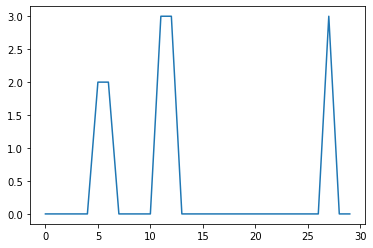

In [4]:
plt.plot(acts[:30])

In [5]:
F.softmax

<function torch.nn.functional.softmax(input, dim=None, _stacklevel=3, dtype=None)>

In [6]:
class Net(nn.Module):

    def __init__(self, input_shape):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_shape, 164)  
        self.fc2 = nn.Linear(164, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
net = Net(input_space)

In [8]:
net

Net(
  (fc1): Linear(in_features=128, out_features=164, bias=True)
  (fc2): Linear(in_features=164, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
enc = OneHotEncoder()

In [11]:
labels = enc.fit_transform(acts.reshape(-1, 1))

In [12]:
labels = labels.todense()

In [13]:
criterion = nn.CrossEntropyLoss()

In [14]:
gpu_available = torch.cuda.is_available()
device_name = 'cuda' if gpu_available else 'cpu'
device = torch.device(device_name)
print(f'Using {device_name}')

Using cpu


In [15]:
acts = list(map(lambda x: x-1 if x>0 else 0, list(acts)))

In [16]:
obs = torch.tensor(obs, dtype=torch.float)
labels = torch.tensor(acts, dtype=torch.long)

In [17]:
labels

tensor([0, 0, 0,  ..., 0, 0, 0])

In [18]:
labels.shape

torch.Size([1250])

In [19]:
labels

tensor([0, 0, 0,  ..., 0, 0, 0])

In [20]:
import torch.optim as optim

# create your optimizer
optimizer = optim.Adam(net.parameters())

In [21]:
def train_loop():
    # in your training loop:
    optimizer.zero_grad()   # zero the gradient buffers

    output = net(obs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    return loss.item()

In [22]:
losses = []

In [23]:
for _ in range(200):
    loss_ = train_loop()
    losses.append(loss_)

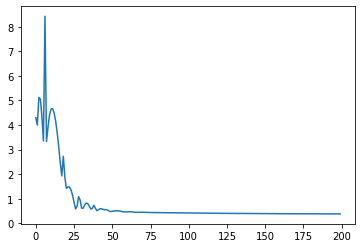

In [24]:
plt.plot(losses)